In [1]:
from sklearn.linear_model import Ridge

In [2]:
from sklearn.model_selection import GridSearchCV

In [3]:
ridge_regressor=Ridge()


In [4]:
ridge_regressor

Ridge()

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [18]:
data = fetch_california_housing()

In [19]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [20]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [21]:
ridge_regressor=Ridge()


In [22]:
ridge_regressor

Ridge()

In [26]:
X = df.drop('Target', axis=1)
y = df['Target']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
ridge = Ridge()
params = {'alpha': [0.1, 1, 5, 10, 20, 50, 100]}

In [30]:
ridge_cv = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 5, 10, 20, 50, 100]},
             scoring='neg_mean_squared_error')

In [31]:
print(ridge_cv.best_params_)

{'alpha': 0.1}


In [32]:
ridge_pred=ridge_cv.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [33]:
print("\n🏆 Best Alpha (Ridge):", ridge_cv.best_params_)
ridge_best = ridge_cv.best_estimator_


🏆 Best Alpha (Ridge): {'alpha': 0.1}


In [34]:
y_pred_ridge = ridge_best.predict(X_test_scaled)


In [35]:
y_pred_ridge

array([0.7191578 , 1.76399956, 2.70962383, ..., 4.46874078, 1.18755727,
       2.0093843 ])

In [36]:
print("Ridge R² Score:", r2_score(y_test, y_pred_ridge))
print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))

Ridge R² Score: 0.5757905180002312
Ridge MSE: 0.5558879138674184


In [38]:
lasso = Lasso(max_iter=10000)
params = {'alpha': [0.001, 0.01, 0.1, 1, 5, 10, 20]}

In [40]:
lasso_cv = GridSearchCV(lasso, params, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [41]:
print("\n🏆 Best Alpha (Lasso):", lasso_cv.best_params_)
lasso_best = lasso_cv.best_estimator_


🏆 Best Alpha (Lasso): {'alpha': 0.001}


In [42]:
y_pred_lasso = lasso_best.predict(X_test_scaled)

print("Lasso R² Score:", r2_score(y_test, y_pred_lasso))
print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))


Lasso R² Score: 0.5768562568705682
Lasso MSE: 0.5544913600832686


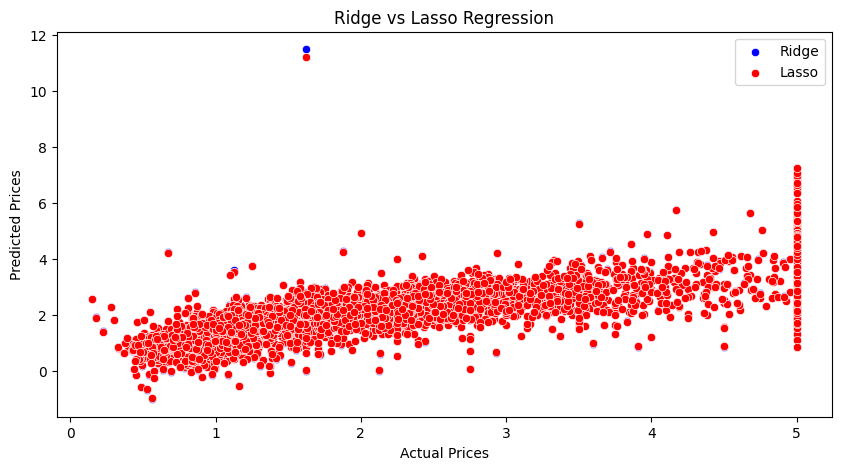

In [43]:
# ============================================
# 6️⃣ Visualization (Predicted vs Actual)
# ============================================
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test, y=y_pred_ridge, color='blue', label='Ridge')
sns.scatterplot(x=y_test, y=y_pred_lasso, color='red', label='Lasso')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Ridge vs Lasso Regression")
plt.legend()
plt.show()